## Random Walks in Finance


### Diffusion through a crack
Simulate an unbiased random walk (Pr(H ) = Pr(T ) = 0.5) with some obstacles. 
- (a) Put a reflecting barrier at x = −4, i.e., the walk may land at −4 but may not stay there, and the next step must be to −3. Plot a sample path and a histogram. 
- (b) Next add a partial block at x = +6, i.e., at x = 6 there is only a 0.25 chance of going to 7 and a 0.75 chance of going to 5 (same for 7 to 6). Plot a histogram. These are results that are hard to get in any way other than by simulation.


In [9]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [10]:
def randomwalk(p_h = .5, n = 1000, border = False):
    loc = 0
    path = [loc]
    for i in range(n):
        if border:
            if loc == 6: 
                loc = loc + 1 if random.random() < 0.25 else loc - 1
                continue
            elif loc == 7: 
                loc = loc - 1 if random.random() < 0.25 else loc + 1
                continue
        if loc == -4:
            loc = -3
        else:
            loc = loc + 1 if random.random() < 0.5 else loc - 1
        path.append(loc)
    return path
      

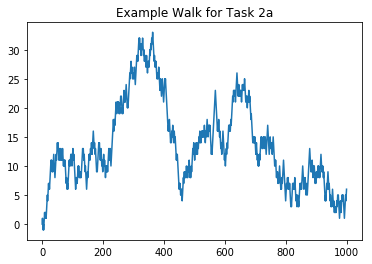

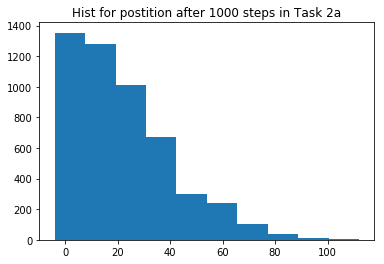

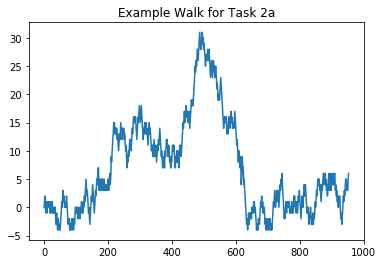

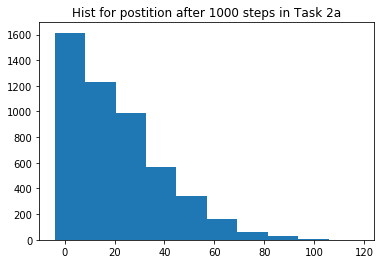

In [11]:
plt.plot(randomwalk())
plt.title("Example Walk for Task 2a")
plt.show()
plt.hist([randomwalk()[-1] for i in range(5000)])
plt.title("Hist for postition after 1000 steps in Task 2a")
plt.show()

plt.plot(randomwalk(border=True))
plt.title("Example Walk for Task 2a")
plt.show()
plt.hist([randomwalk(border=True)[-1] for i in range(5000)])
plt.title("Hist for postition after 1000 steps in Task 2a")
plt.show()

## Wiener process/Brownian motion
Simulate a random walk in the plane as follows. Start at the origin. From any given position, choose a direction from 0 to 360 degrees equally likely, that is, uniformly on [0, 360). Next choose a step size according to a Gaussian (normal) distribution with mean 0 and variance σ2. Advance to that position and continue. Take σ2 to be, variously, 0.5, 1, 2, the idea being to see what effect variance has on the walk. Take the number of steps to be, variously, 20, 400, 1600, again to gauge the effect. Show a typical walk (i.e., a sample path) for one of the 1600 (or more) steps. Also, instead of histogramming, show a density plot, that is, for several walkers, plot a point in the plane where the walker stops

In [22]:
def wiener_walk(var = 1, n = 400):
    path = np.zeros(shape=(n, 2))
    
    for i in range(n):
        angle = random.uniform(0, 360)
        step = random.normalvariate(0, var**.5)
        path[i] = path[i-1] + np.array([math.sin(angle) * step, math.cos(angle) * step])
        
    return path

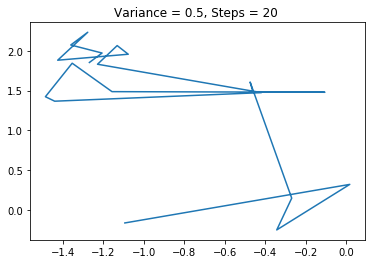

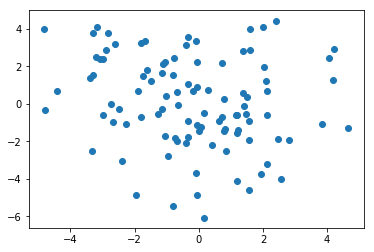

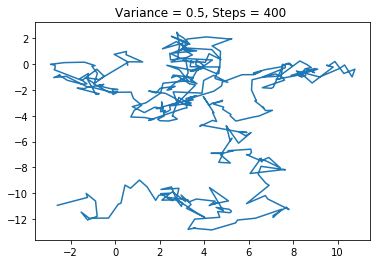

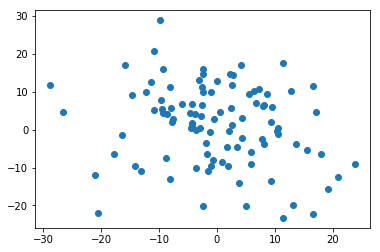

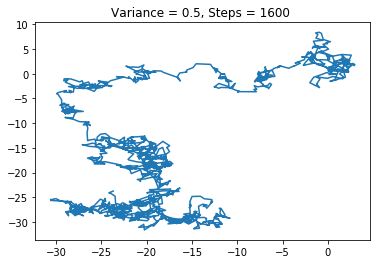

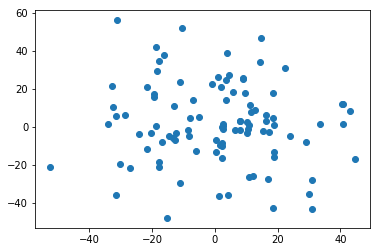

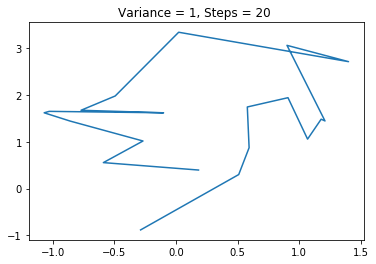

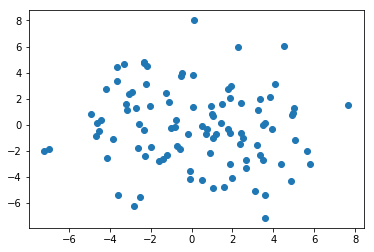

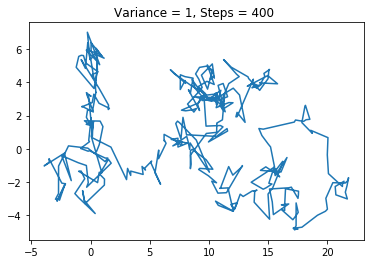

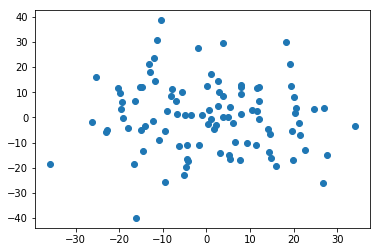

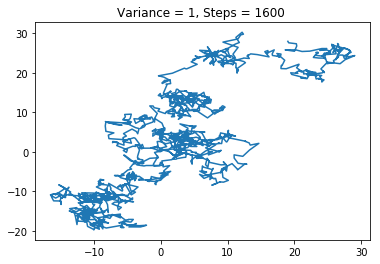

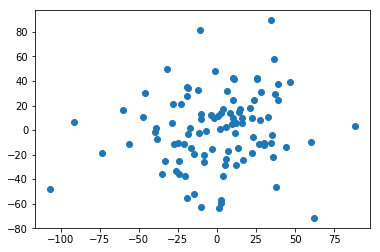

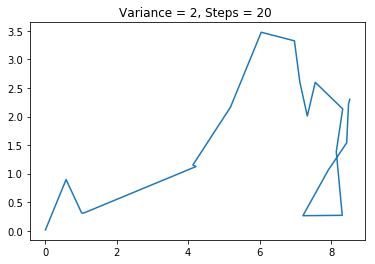

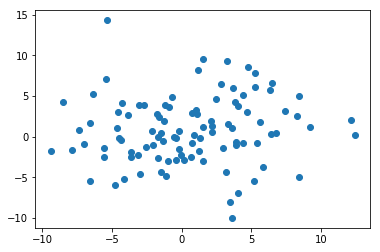

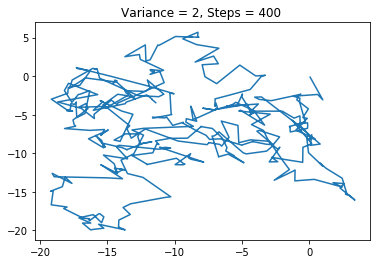

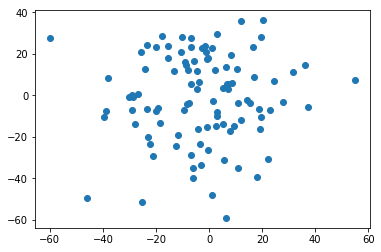

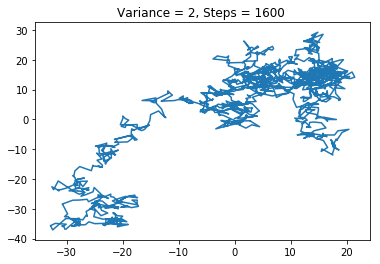

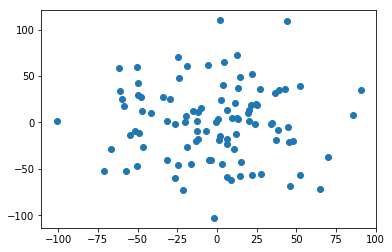

In [45]:
for var in [.5, 1, 2]:
    for steps in [20, 400, 1600]:
        walk = wiener_walk(var, steps)
        
        plt.plot(walk[:,0], walk[:,1])
        plt.title(f"Variance = {var}, Steps = {steps} ")
        plt.show()
        
        # take a n*2 np array, make it a list of n tuples, then zip it into a 2*n list,
        plt.scatter(*zip(*[tuple(wiener_walk(var, steps)[-1]) for _ in range(100)]))
        plt.show()

## Diffusion in the plane
Starting at the origin in the plane, carry out a random walk on the lattice of integer coordinate points over the square [−20, 20] × [−20, 20]. Assume that there is a square hole whose boundary is (13, 7), (14, 7), (14, 8), and (13, 8). Walks that reach this hole are absorbed, along with any walk which reaches the boundary. Show the distribution of final positions for walks of various steps and especially the fraction that enters the hole. 

In [60]:
def hole_walk(p=.5, n=100):
    path = np.zeros(shape=(n, 2))
    for i in range(n):
        
        # random walk in both x and y direction
        path[i] = path[i-1] + np.array([1 if random.random() > p else -1, 1 if random.random() > p else -1])
        
        # if we exceed the boundary, end the walk.
        if path[i,0] >= 20 or path[i,0] <= -20 or path[i,1] >= 20 or path[i,1] <= -20:
            path[-1] = path[i]
            path[i] = [None, None]
            return path, False
        
        # if we fall into the hole, end the walk.
        elif path[i,0] in [13,14] and path[i,1] in [7,8]:
            path[i] = [None, None]
            return path, True
        
    # end the walk normally if ending within the plane.
    return path, False

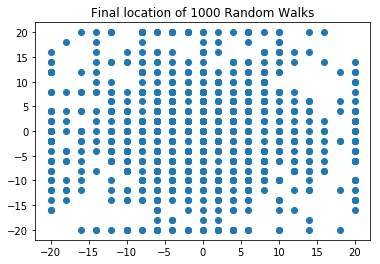

In [61]:
plt.scatter(*zip(*[tuple(hole_walk()[0][-1]) for i in range(1000)]))
plt.title(f"Final location of 1000 Random Walks")
plt.show()


In [67]:
sum([hole_walk()[1] for i in range(10000)])/10000

0.0336